# Nobel Prize Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Overview of Dataset

In [2]:
# Reading the file
nobel_df = pd.read_json("nobel_data.json")
nobel_df

,url,category,year,role,Name,City,Country,Gender,Profession,"Year, Birth","Year, Death",University,prize_status,State,Department
0,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1959,Nominee,Women´s International League for Peace and F...,Geneva,SWITZERLAND (CH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1959,Nominator,Inger Segerstedt Wiberg,NaN,SWEDEN (SE),F,Member of Parliament,NaN,NaN,NaN,NaN,NaN,NaN
2,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Prize in Physics,1901,Nominee,William W Campbell,NaN,UNITED STATES (US),M,NaN,1862.0,1938.0,NaN,NaN,NaN,NaN
3,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Prize in Physics,1901,Nominee,Svante A Arrhenius,Stockholm,SWEDEN (SE),M,NaN,1859.0,1927.0,Stockholm University,Awarded the Nobel Prize in Chemistry,NaN,NaN
4,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Prize in Physics,1901,Nominee,Svante A Arrhenius,Stockholm,SWEDEN (SE),M,NaN,1859.0,1927.0,Stockholm University,Awarded the Nobel Prize in Chemistry,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40934,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1964,Nominator,2 members of Yugoslav parliament,NaN,YUGOSLAVIA (YU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40935,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1964,Nominee,Norman Thomas,NaN,UNITED STATES (US),M,American politician,1884.0,1968.0,NaN,NaN,NaN,NaN
40936,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1964,Nominator,John P Roche,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40937,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1964,Nominee,World Veterans Federation (Fédération Mondia...,Paris,FRANCE (FR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# All the Categories of Data Collected
nobel_df.columns

Index(['url', 'category', 'year', 'role', 'Name', 'City', 'Country', 'Gender',
       'Profession', 'Year, Birth', 'Year, Death', 'University',
       'prize_status', 'State', 'Department'],
      dtype='object')

The above table is the dataset used for this Nobel Prize Project. As seen in the list above, the dataset includes various categories for consideration such as the year, nominator's and nominee's countries, the nominee's prize status (if they won), nominee's and nominator's professions, etc. Despite this expansive dataset, there is only data from 1901 - 1964, limiting the scope of analysis.

In this project, we will analyze general trends in the data and will forecast possible trends in the future.

In [4]:
# Used to expand DataFrame into smaller sections for Analysis
def make_1D(col):
    return pd.Series([item for list in col for item in list])

In [5]:
# Splitting Nominee and Nominator Data
nominators = nobel_df[nobel_df['role'] == "Nominator"]
nominees = nobel_df[nobel_df['role'] == "Nominee"]
unique_nominators = nominators.drop_duplicates(subset=['Name'])
unique_nominees = nominees.drop_duplicates(subset=['Name'])

## Nominee and Nominator Profile

### Age

In [6]:
unique_nominees.describe()

,year,"Year, Birth","Year, Death"
count,3261.000000,2116.000000,1769.000000
mean,1935.370745,1879.789698,1958.446580
std,20.088002,25.456767,26.608006
min,1901.000000,1647.000000,1901.000000
25%,1918.000000,1863.000000,1938.000000
50%,1935.000000,1881.000000,1961.000000
75%,1953.000000,1899.000000,1977.000000
max,1967.000000,1987.000000,2019.000000


In [7]:
unique_nominators.describe()

,year,"Year, Birth","Year, Death"
count,9902.000000,1282.000000,1150.000000
mean,1935.619168,1887.968019,1968.587826
std,19.996219,26.609585,27.170810
min,1901.000000,1647.000000,1885.000000
25%,1920.000000,1869.000000,1951.000000
50%,1935.000000,1894.000000,1973.000000
75%,1953.000000,1907.000000,1989.000000
max,1967.000000,1956.000000,2017.000000


Based on the above tables, a nominee was, on average, 55.58 years old when nominated for the first time. A nominator was, on average, 47.65 years old when nominating for the first time.

### Top 20 Nominator and Nominee Countries

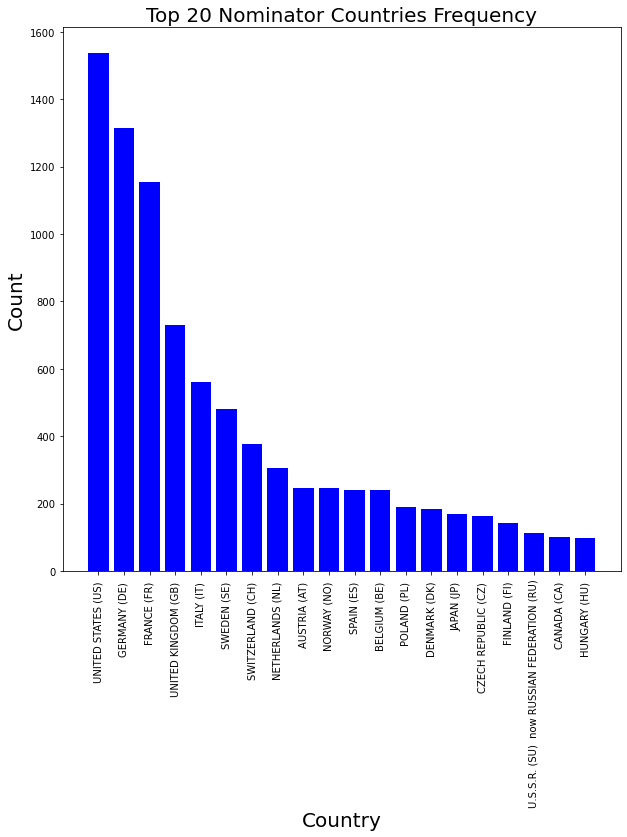

In [8]:
nom_country = unique_nominators['Country']
nominator_country_top20 = nom_country.value_counts().nlargest(n=20)
count = 0
plt.figure(figsize=(10, 10))
for i in nominator_country_top20.index:
    plt.bar(nominator_country_top20.index[count],nominator_country_top20.values[count], color='blue')
    count = count + 1

plt.title('Top 20 Nominator Countries Frequency', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Count', fontsize = 20)
plt.show() 

The above graph shows the top 20 countries with the most nominators. This list comprises of global superpowers and well-developed nations, such as Germany, US, UK, and etc.

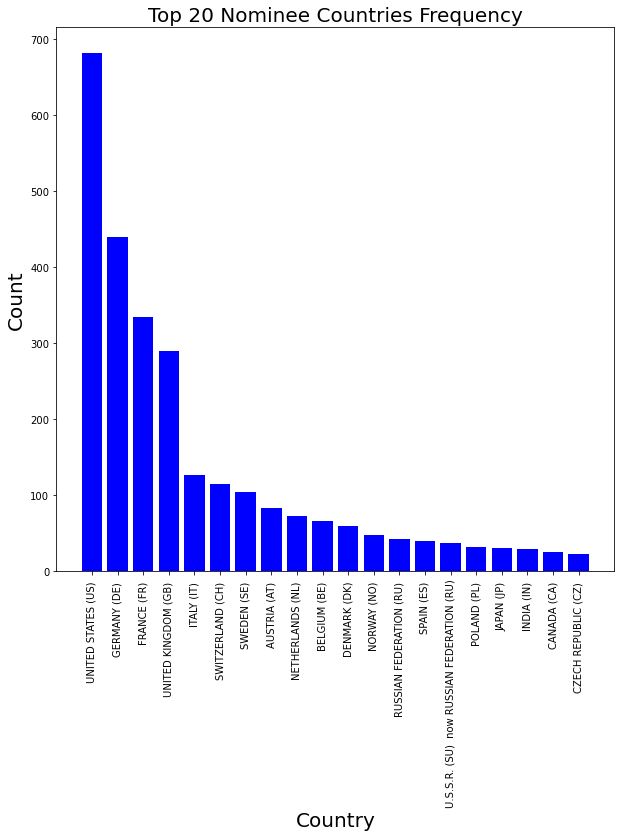

In [9]:
nominee_country = unique_nominees['Country']
nominee_country_top20 = nominee_country.value_counts().nlargest(n=20)
count = 0
plt.figure(figsize=(10, 10))
for i in nominee_country_top20.index:
    plt.bar(nominee_country_top20.index[count],nominee_country_top20.values[count], color='blue')
    count = count + 1

plt.title('Top 20 Nominee Countries Frequency', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Count', fontsize = 20)
plt.show()

The above graph shows the top 20 countries with the most nominees. This list comprises of global superpowers and well-developed nations, such as Germany, US, UK, and etc.

### Nominee and Nominator Gender

In [10]:
nominee_gender = nominees['Gender']
nominee_gender_series = nominee_gender.value_counts(normalize= True) * 100
nominee_gender_series.drop("<", inplace=True)
nominee_gender_series

M    95.66963
F     4.32559
Name: Gender, dtype: float64

In [11]:
nominator_gender = nominators['Gender']
nominator_gender_series = nominator_gender.value_counts(normalize= True) * 100
nominator_gender_series['M':'F']

M    98.055182
F     1.877524
Name: Gender, dtype: float64

## Country Trends

## Gender Breakdown

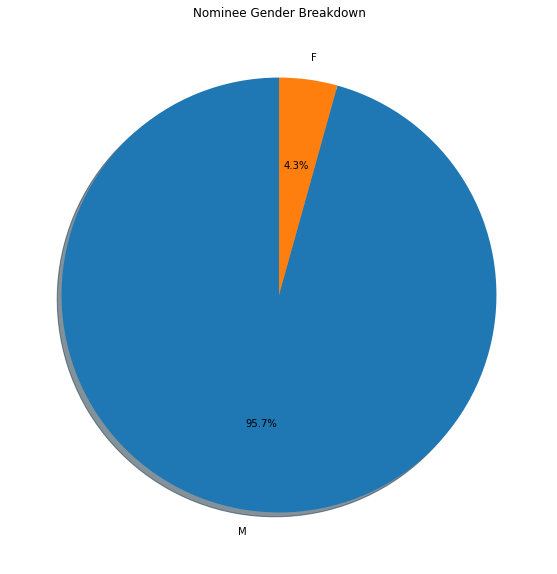

In [12]:
plt.figure(figsize=(15, 10))
plt.pie(nominee_gender_series.values, labels=nominee_gender_series.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Nominee Gender Breakdown')
plt.show()

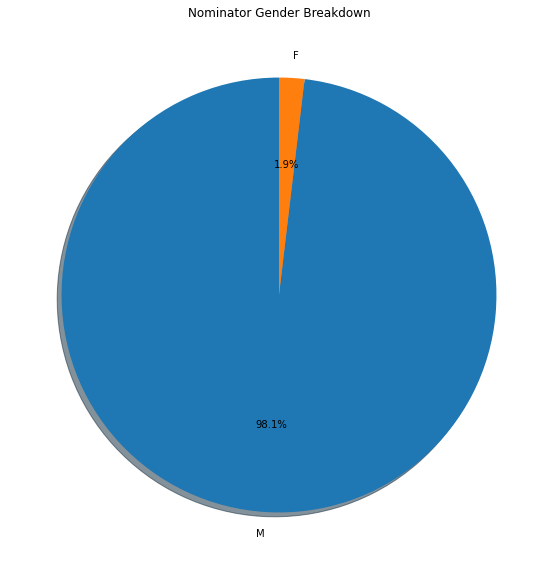

In [13]:
plt.figure(figsize=(15, 10))
plt.pie(nominator_gender_series.values[0:2], labels=nominator_gender_series.index[0:2], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Nominator Gender Breakdown')
plt.show()

The above graphs show the gender breakdowns for nominees and nominators. There is a clear male-dominant group of nominators and nominees at a high 95.7% and 98.1% respectively. 

### Nominee Gender Breakdown by Category of Prize

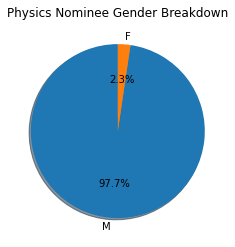

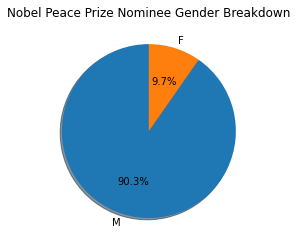

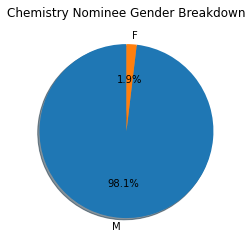

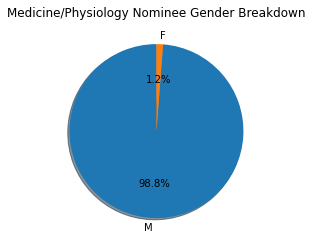

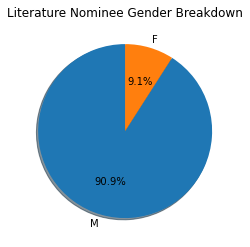

In [14]:
#Physics
physics = nominees[nominees['category'] == "Nomination for Nobel Prize in Physics"]
physics_gender = physics['Gender']
physics_gender_series = physics_gender.value_counts(normalize= True) * 100
plt.pie(physics_gender_series.values[0:2], labels=physics_gender_series.index[0:2], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Physics Nominee Gender Breakdown')
plt.show()

#Peace
peace = nominees[nominees['category'] == "Nomination for Nobel Peace Prize"]
peace_gender = peace['Gender']
peace_gender_series = peace_gender.value_counts(normalize= True) * 100
plt.pie(peace_gender_series.values[0:2], labels=peace_gender_series.index[0:2], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Nobel Peace Prize Nominee Gender Breakdown')
plt.show()


#Chemistry
chemistry = nominees[nominees['category'] == "Nomination for Nobel Prize in Chemistry"]
chemistry_gender = chemistry['Gender']
chemistry_gender_series = chemistry_gender.value_counts(normalize= True) * 100
plt.pie(chemistry_gender_series.values[0:2], labels=chemistry_gender_series.index[0:2], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Chemistry Nominee Gender Breakdown')
plt.show()


#Medicine
medicine = nominees[nominees['category'] == "Nomination for Nobel Prize in Physiology or Medicine"]
medicine_gender = medicine['Gender']
medicine_gender_series = medicine_gender.value_counts(normalize= True) * 100
plt.pie(medicine_gender_series.values[0:2], labels=medicine_gender_series.index[0:2], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Medicine/Physiology Nominee Gender Breakdown')
plt.show()


#Literature
literature = nominees[nominees['category'] == "Nomination for Nobel Prize in Literature"]
literature_gender = literature['Gender']
literature_gender_series = literature_gender.value_counts(normalize= True) * 100
plt.pie(literature_gender_series.values[0:2], labels=literature_gender_series.index[0:2], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Literature Nominee Gender Breakdown')
plt.show()

The above pie charts show the gender breakdowns for nominees in all categories. STEM related categories (Physics, Chemistry, and Medicine) are more male-dominated, with only 1-2% female nominees, than humanities oriented categories (Peace and Literature), which have 9-10% female nominees.